In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

In [23]:
df = pd.read_csv('..\\Datasets\\Iris.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [25]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [28]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [29]:
x = df.drop(columns  =['Species','Id'],axis = 1)
y = df['Species']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25)

In [32]:
from sklearn.svm import SVC

In [33]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [34]:
model = SVC(C=1.0,kernel='poly',degree=3)

In [35]:
model.fit(xtrain,ytrain)
ypredict = model.predict(xtest)

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix

Accuracy: 0.9473684210526315


<AxesSubplot:>

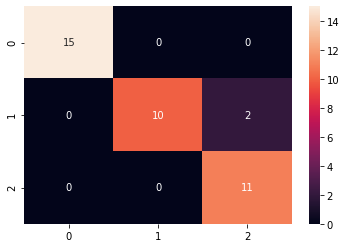

In [37]:
print('Accuracy:',accuracy_score(ytest,ypredict))
sns.heatmap(confusion_matrix(ytest,ypredict),annot = True)

In [38]:
# x = df.drop('Species',axis = 1)
# y = df['Species']
# x = x**2
print(x)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [39]:
#Tunning parameter
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree  = list(range(1,10))
gamma = ['scale']
C=[100,50,10,1,0.1,0.01]
grid_param = {
    'kernel':kernel,
    'degree':degree,
    'gamma':gamma,
    'C':C
    
}

from sklearn.model_selection import RepeatedStratifiedKFold
cv= RepeatedStratifiedKFold(n_splits=5,n_repeats=5,random_state=1)

from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator=SVC(),param_grid=grid_param,cv=cv,scoring='accuracy',n_jobs=1)

res=grid_cv.fit(xtrain,ytrain)
print(res.best_params_)
print(res.best_score_)

{'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.9875889328063242
